In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("H:\\AiQuest\\Ai& ML\\class\\class 13\\Customer-Churn-Prediction.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
1869/(1869+5174)

0.2653698707936959

In [9]:
df = df.dropna()

In [10]:
#drop_duplicate
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(7043, 21)

In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<AxesSubplot:>

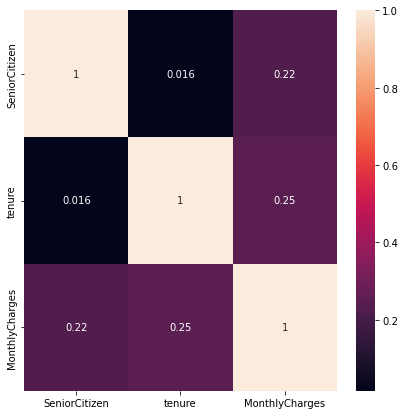

In [13]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot = True)

# visualization with seaborn

<AxesSubplot:xlabel='Churn', ylabel='count'>

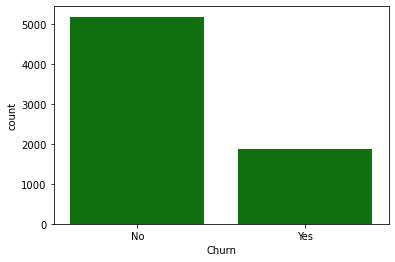

In [14]:
sns.countplot(df['Churn'], color = 'green')

<AxesSubplot:xlabel='count', ylabel='gender'>

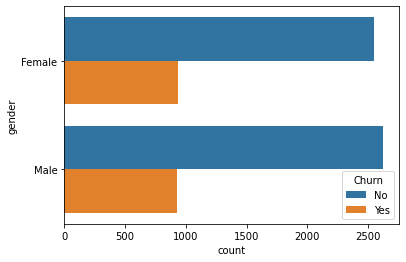

In [15]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<AxesSubplot:xlabel='count', ylabel='InternetService'>

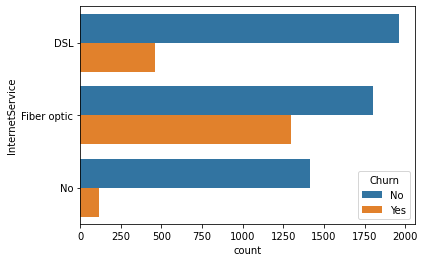

In [16]:
sns.countplot(y = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='count', ylabel='PhoneService'>

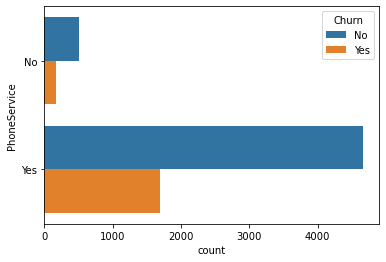

In [17]:
sns.countplot(y = 'PhoneService', hue='Churn', data=df)

<AxesSubplot:xlabel='count', ylabel='OnlineSecurity'>

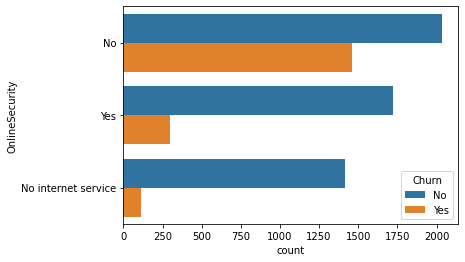

In [18]:
sns.countplot(y = 'OnlineSecurity',hue='Churn', data=df)

In [19]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

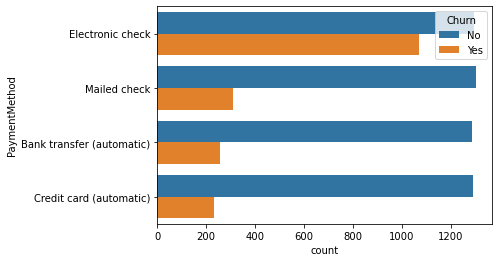

In [20]:
#plt.subplots(figsize=(10,6)) 
sns.countplot(y = 'PaymentMethod', hue='Churn', data=df)

# Preprocess the dataset

In [21]:
#Drop Customer id
df = df.drop('customerID', axis=1)
df.shape

(7043, 20)

# Encode the dataset

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype

In [25]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])
        
    

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# seperate train and test data (x, y)

In [27]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [28]:
x.shape

(7043, 19)

In [29]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

# Imbalanced Data Handling

In [30]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
not_charned = (5174/(5174+1869)) * 100
charned = (1869/(5174+1869)) *100

In [32]:
print('Not churned {} percent of total  people'.format(not_charned))
print('Churned {} percent of total  people'.format(charned))

Not churned 73.4630129206304 percent of total  people
Churned 26.536987079369588 percent of total  people


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [33]:
#!pip install imblearn

In [34]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state = 42)

In [35]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [36]:
df.shape  # before sampling

(7043, 20)

In [37]:
X, Y = sm.fit_resample(x, y )

In [38]:
X.shape

(9610, 19)

In [39]:
Y.value_counts()

0    4805
1    4805
Name: Churn, dtype: int64

# Near Miss for Under_Sampling

In [40]:
from imblearn.under_sampling import NearMiss
NearMiss_obj = NearMiss()

new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [41]:
new_x.shape

(3738, 19)

In [42]:
3738/2

1869.0

In [43]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [44]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
over = RandomOverSampler(random_state=100)

In [48]:
x_new , y_new = over.fit_resample(x,y)

In [49]:
x_new.shape

(10348, 19)

In [50]:
y_new.shape

(10348,)

In [51]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Cross Validation

# Hold Out Cross Validation

In [52]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 
xtrain.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [53]:
train , test = train_test_split(df, train_size=.80, random_state=42) 

In [54]:
train.to_csv('total 80.csv')

In [55]:
training_data = pd.read_csv('total 80.csv')
training_data.shape

(5634, 21)

In [56]:
rows, col = df.shape
rows2, cols2 = training_data.shape

In [57]:
rows,  col

(7043, 20)

In [58]:
rows2, cols2 

(5634, 21)

# with sampling

DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
Clf = DecisionTreeClassifier()

Clf.fit(xtrain,ytrain)
Clf.score(xtest,ytest)   #after sampling

0.8627754155392346

# Without sampling

In [60]:
x.shape

(7043, 19)

In [61]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 
Clf.fit(xtrain1, ytrain1) 
Clf.score(xtest1,ytest1)   #imbalanced data

0.7359454855195912

# XGBoost Classifier

In [62]:
#!pip install xgboost

In [63]:
import xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [64]:
xgb.fit(xtrain,ytrain)
xgb.score(xtest,ytest)  #after sampling

0.860456126787785

In [65]:
xgb.fit(xtrain1,ytrain1)  #before sampling
xgb.score(xtest1, ytest1)

0.7910278250993753

# AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [67]:
ada.fit(xtrain,ytrain)
ada.score(xtest,ytest)    #after sampling

0.7715500579822188

In [68]:
ada.fit(xtrain1, ytrain1)
ada.score(xtest1, ytest1)      #before sampling

0.797274275979557

# Cross Validation

In [69]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [70]:
kfold = KFold(n_splits=4, shuffle = True)     #each fold contain 25% data

In [71]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [72]:
result

array([0.84615385, 0.855431  , 0.85890993, 0.84538075])

In [73]:
result.mean()

0.851468882875918

In [74]:
result.max()

0.8589099342868187

In [75]:
result.min()

0.845380749903363

# Stratified k fold cross Validation

In [76]:
from sklearn.model_selection import StratifiedKFold
st = StratifiedKFold(n_splits=4)
score2 = cross_val_score(xgb, x_new, y_new,cv=st)

In [77]:
score2

array([0.84808659, 0.8562041 , 0.85890993, 0.8867414 ])

In [78]:
score2.max()

0.8867413993042134

In [79]:
score2.min()

0.8480865867800541

In [80]:
score2.mean()

0.8624855044453035